## Workshop Week 6

## Logistic Regression
Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
bcancer = pd.read_csv("data/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
bcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sample_code_number           699 non-null    int64  
 1   clump_thickness              699 non-null    int64  
 2   uniformity_cell_size         699 non-null    int64  
 3   uniformity_cell_shape        699 non-null    int64  
 4   marginal_adhesion            699 non-null    int64  
 5   single_epithelial_cell_size  699 non-null    int64  
 6   bare_nuclei                  683 non-null    float64
 7   bland_chromatin              699 non-null    int64  
 8   normal_nucleoli              699 non-null    int64  
 9   mitoses                      699 non-null    int64  
 10  class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [4]:
# Examine the data: check number of rows and number of columns
bcancer.shape

(699, 11)

In [5]:
# Look at the statistical summary of the dataframe
bcancer.describe()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# Check how many classes we do have from the "class" column
bcancer['class'].unique()

array([2, 4], dtype=int64)

In [7]:
# Check number of samples for each class and comment whether dataset is balanced?
bcancer['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [8]:
# Deal with the NaN values in the data
bcancer.dropna(inplace =True)
bcancer.shape

(683, 11)

In [9]:
# Split your data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(bcancer, train_size=0.8, random_state=146)
print(train.shape)
print(test.shape)

(546, 11)
(137, 11)


In [10]:
columns = bcancer.columns.to_list()
columns

['sample_code_number',
 'clump_thickness',
 'uniformity_cell_size',
 'uniformity_cell_shape',
 'marginal_adhesion',
 'single_epithelial_cell_size',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses',
 'class']

In [11]:
bcancer.corr()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
sample_code_number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
clump_thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
uniformity_cell_size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
uniformity_cell_shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single_epithelial_cell_size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


In [12]:
from sklearn.feature_selection import RFE
feature_cols = ['clump_thickness','uniformity_cell_size','uniformity_cell_shape','marginal_adhesion',
                'single_epithelial_cell_size','bare_nuclei', 
                'bland_chromatin','normal_nucleoli','mitoses',]
X_train = train[feature_cols]
y_train = train['class']
# for testing
X_test = test[feature_cols]
y_test = test['class']

In [13]:
# Build your Logistic Regression model

logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
predicted = logreg.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))


MSE: 0.058394160583941604
R^2: 0.931328320802005


In [14]:
# Do predictions on test set
logreg.predict([[2,1,5,4,7,8,7,9,7,]])

array([4], dtype=int64)

In [15]:
logreg.predict([[1,1,1,1,1,0,0,0,0,]])

array([2], dtype=int64)

### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [16]:
# Evaluate the performance of your trained model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, predicted)

array([[94,  1],
       [ 1, 41]], dtype=int64)

C:\Apps\ANACONDA\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[2 2 2 4 4 4 2 2 4 4 2 4 2 4 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 4 4 4 4 4 2 2 2 2 4 2 2 2 2 2 2 2 4 4 2 4 4 4 2 2 2 4 4 2 2 4 2 2 4 2
 2 2 2 4 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 4 2 2 4 4 2 2 4 2 4 2 2 2 2 2 4
 2 2 2 2 2 4 2 2 4 4 2 2 2 2 2 2 4 2 2 2 2 4 2 4 2 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


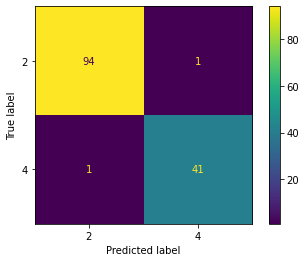

In [17]:
cm = ConfusionMatrixDisplay(y_test, predicted)
cm = confusion_matrix(y_test, predicted, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()
sns.set_style('dark')

**This is the checkpoint mark for this week's workshop. You need to report `Accuracy Score` on test set and also show `confusion matrix`. You also need to provide analysis based on the results you got.**

### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [18]:
from sklearn.feature_selection import RFE

estimator = LogisticRegression(C=1e9)
selector = RFE(estimator, 6)  # select 3 features for us
selector = selector.fit(X_test, y_test)
feature_cols =np.array(['clump_thickness','uniformity_cell_size','uniformity_cell_shape','marginal_adhesion',
                'single_epithelial_cell_size','bare_nuclei', 
                'bland_chromatin','normal_nucleoli','mitoses',])
supp = selector.get_support()
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)
# test the model
predicted = selector.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

Selected features: ['clump_thickness' 'uniformity_cell_size' 'uniformity_cell_shape'
 'bare_nuclei' 'bland_chromatin' 'mitoses']
Coeffs: [[  8.8772824   37.12995462  29.62874527  20.9119095  -28.39295451
   32.32131066]]
MSE: 0.0
R^2: 1.0


C:\Apps\ANACONDA\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 

Surprisingly, I got a very high R squared and a low MSE. However, in the last code 'selector.estimator_.coef_', I got correlation coeffients like 30 or -30 which sould nor be.